In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import seaborn as sns
import demoji
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")



df = pd.read_csv("C:/ML/python/data/Capsule Hotel Risk Classification Dataset (English Translated) - Sheet1.csv",delimiter=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          700 non-null    int64 
 1   content             700 non-null    object
 2   translated_content  700 non-null    object
 3   priority_score      700 non-null    int64 
 4   problem_domain      700 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 27.5+ KB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df.head(10)

,Unnamed: 0,content,translated_content,priority_score,problem_domain
0,1,"Sorry, including the expensive price + apk usi...","Sorry, including the expensive price + apk usi...",2,0
1,2,Setelah install terus pas buka aplikasi ngebla...,"After installed, the app stuck with white display",3,1
2,3,"gak bisa submit pada saat verifikasi data, pad...","Cannot submit the data verification, even my i...",3,1
3,4,Aplilasi restart mulu,The app keep restarting,3,1
4,5,"udah mahal , makanan ga enak, banyak lalat","Overpriced, bad food, too many flies",2,0
5,6,"fitur chat dengan host tidak bisa digunakan, p...","The chat feature which is important, can't be ...",2,1
6,7,Mahal mahal.. kirain LBH murah dari refdorz da...,"Overpriced, at first I think it's cheaper than...",2,0
7,8,duh ini berisik amat yg diatas. Pake peredam d...,It's very noisy up there. Please add the sound...,2,0
8,9,"ribet pemesanan nya, pelayanan nya juga kurang...",It's not seamless anyway. The service is bad,2,1
9,10,APA APAAN HARUS UPDATE APP,"COME ON, I HAVE TO UPDATE THE APP FREQUENTLY",2,1


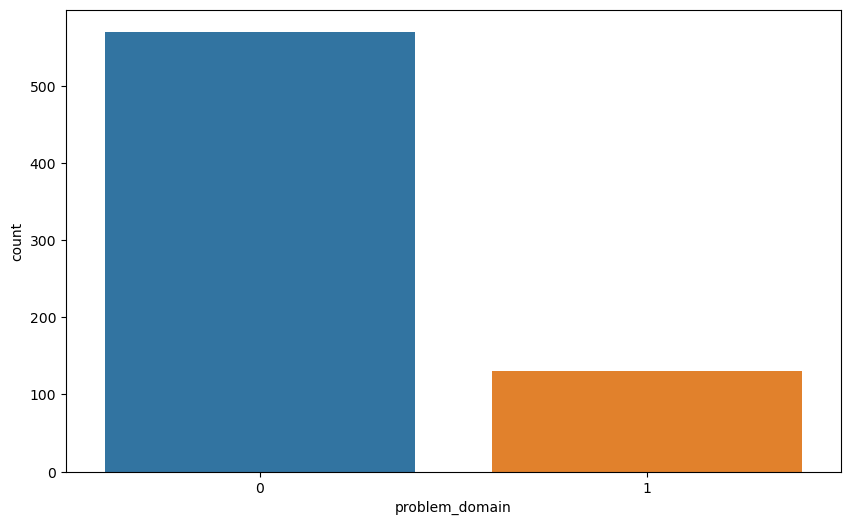

In [3]:
df.drop(['content','Unnamed: 0'],axis=1,inplace=True)

fig,axs = plt.subplots(figsize=(10,6))
sns.countplot(x='problem_domain',data=df)
plt.show()

<Axes: ylabel='count'>

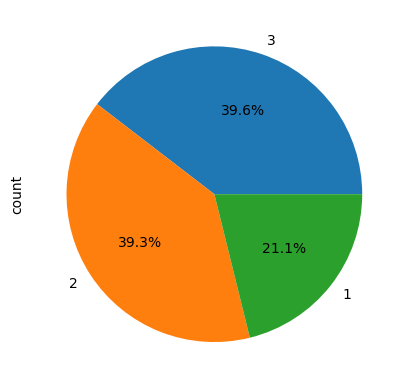

In [4]:
df['priority_score'].value_counts().plot(kind='pie',autopct="%1.1f%%")


In [5]:

def clean_text(text):
    
    text = str(text).lower()
    
    text = re.sub('<.*?>', '',text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = demoji.replace(text,'')
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    text = re.sub('\d', '',text)
    
    text = re.sub('\n','',text)
    
    text = re.sub('\n\n','',text)
    
    text = re.sub('\w*\d\w*', '', text)

    text = re.sub('loading', '',text)
    
    text = re.sub('\b', '',text)


    return text


df['translated_content'] = df['translated_content'].apply(clean_text)

df['translated_content'].head(10)

0    sorry including the expensive price  apk using...
1     after installed the app stuck with white display
2    cannot submit the data verification even my in...
3                              the app keep restarting
4                   overpriced bad food too many flies
5     the chat feature which is important cant be used
6    overpriced at first i think its cheaper than r...
7    its very noisy up there please add the sound r...
8           its not seamless anyway the service is bad
9          come on i have to update the app frequently
Name: translated_content, dtype: object

In [6]:
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)



df['translated_content'] = df['translated_content'].apply(remove_stopwords)


In [7]:
lemma = WordNetLemmatizer()
def lemm_text(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lemma_tokens)

df['translated_content'] = df['translated_content'].apply(lemm_text)


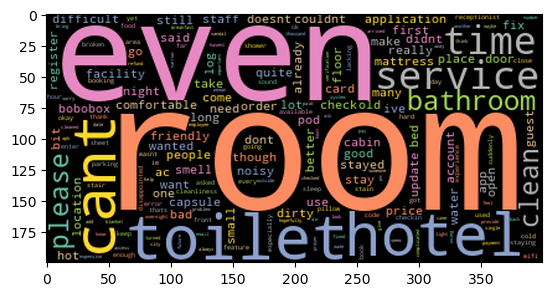

In [8]:
#wordcloud 

text = " ".join(i for i in df['translated_content'])


from wordcloud import WordCloud




wc = WordCloud(colormap='Set2',collocations=False).generate(text)
plt.imshow(wc,interpolation='blackman')
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_ = df['translated_content']
X_ = cv.fit_transform(X_).toarray()
y_ = df['problem_domain']



X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size=.20,random_state=42)




from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
MNB=  MultinomialNB()
BNB = BernoulliNB()
GNB = GaussianNB()

from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
PA = PassiveAggressiveClassifier()
lr = LogisticRegression()

from sklearn.metrics import classification_report,accuracy_score

def evaluate_regular(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --CLF RPT-- {clf_rpt}')
    return pred


lr_pred = evaluate_regular(X_train, X_test, y_train, y_test, lr)
MNB_pred = evaluate_regular(X_train, X_test, y_train, y_test, MNB)
BNB_pred = evaluate_regular(X_train, X_test, y_train, y_test, BNB)
GNB_pred = evaluate_regular(X_train, X_test, y_train, y_test, GNB)
PA_pred = evaluate_regular(X_train, X_test, y_train, y_test, PA)

LogisticRegression, --ACC-- 86.43%; --CLF RPT--               precision    recall  f1-score   support

           0       0.87      0.98      0.92       112
           1       0.85      0.39      0.54        28

    accuracy                           0.86       140
   macro avg       0.86      0.69      0.73       140
weighted avg       0.86      0.86      0.84       140

MultinomialNB, --ACC-- 88.57%; --CLF RPT--               precision    recall  f1-score   support

           0       0.93      0.93      0.93       112
           1       0.71      0.71      0.71        28

    accuracy                           0.89       140
   macro avg       0.82      0.82      0.82       140
weighted avg       0.89      0.89      0.89       140

BernoulliNB, --ACC-- 74.29%; --CLF RPT--               precision    recall  f1-score   support

           0       0.81      0.88      0.85       112
           1       0.28      0.18      0.22        28

    accuracy                           0.74       

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,SpatialDropout1D,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

X = df['translated_content']
y = df['problem_domain']

#train/test split for LTSM Model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15,random_state=42)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

In [11]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length

print(max_length)

120


In [12]:
#padded sequences
from tensorflow.keras.utils import pad_sequences

X_train = pad_sequences(X_train,120,padding="post")
X_test = pad_sequences(X_test,120,padding="post")


In [13]:
RNN = Sequential()
RNN.add(Embedding(len(word_index) + 1, output_dim=150, input_length=120))
RNN.add(SpatialDropout1D(0.3))
RNN.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01))))
RNN.add(Dense(2, activation='sigmoid'))

RNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 64
early_stopping = EarlyStopping(monitor='val_loss', restore_best_weights=True)

history = RNN.fit(X_train, y_train, batch_size=batch_size, epochs=50, 
                   validation_split=0.2, callbacks=[early_stopping])

results = RNN.evaluate(X_test, y_test)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 400ms/step - accuracy: 0.7130 - loss: 4.7967 - val_accuracy: 0.7899 - val_loss: 4.0233
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - accuracy: 0.8253 - loss: 3.7637 - val_accuracy: 0.7899 - val_loss: 3.2301
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.8438 - loss: 2.9954 - val_accuracy: 0.7899 - val_loss: 2.6000
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.8325 - loss: 2.4116 - val_accuracy: 0.7899 - val_loss: 2.1036
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.8281 - loss: 1.9396 - val_accuracy: 0.7899 - val_loss: 1.6992
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.8364 - loss: 1.5477 - val_accuracy: 0.7899 - val_loss: 1.3955
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.8247 - loss: 1.2727 - val_accuracy: 0.7899 - val_loss: 1.1435
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.8260 - loss: 1.0435 - val_accuracy: 0.7899 - val_loss

[0.3649032711982727, 0.8952381014823914]
Max training accuracy:  0.9621848464012146
Max validation accuracy:  0.8991596698760986


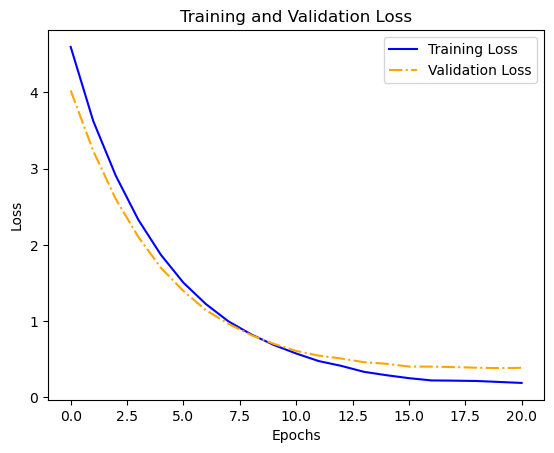

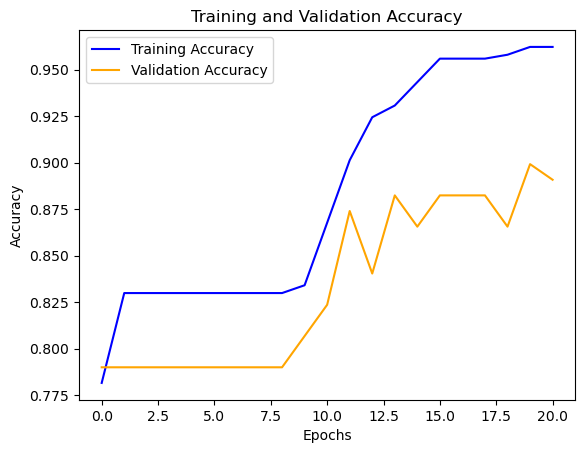

In [14]:
print(results)

print("Max training accuracy: ", max(history.history['accuracy']))
print("Max validation accuracy: ", max(history.history['val_accuracy']))


plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='-.')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

